In [247]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

import sklearn.metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score,f1_score,r2_score,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [248]:
df= pd.read_csv('diabetic_data.csv', delimiter=',')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 101766 rows and 50 columns


In [249]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [251]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [252]:
for i in df.columns:
    if np.array(df[i].value_counts())[0]>101750:
        print(df[i].value_counts())


No        101765
Steady         1
Name: acetohexamide, dtype: int64
No        101763
Steady         3
Name: troglitazone, dtype: int64
No    101766
Name: examide, dtype: int64
No    101766
Name: citoglipton, dtype: int64
No        101753
Steady        13
Name: glipizide-metformin, dtype: int64
No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64
No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64
No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64


In [253]:
df['patient_nbr'].value_counts()

88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64

In [254]:
df['encounter_id'].value_counts()

2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101766, dtype: int64

In [255]:
print('Total data = ', len(df))
print('Unique entries = ', len(np.unique(df['patient_nbr'])))
df.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
print('Length after removing Duplicates:', len(df))

Total data =  101766
Unique entries =  71518
Length after removing Duplicates: 71518


In [256]:
df.drop(['glimepiride-pioglitazone','metformin-pioglitazone','patient_nbr','encounter_id','acetohexamide','troglitazone','examide','citoglipton'],axis=1,inplace=True)

In [257]:
df.replace('?',np.nan,inplace=True)

In [258]:
for i in df.columns:
    if df[i].isna().sum()>0:
        print(i,df[i].isna().sum()*100/len(df))

race 2.7237898151514304
weight 96.0107944853044
payer_code 43.4058558684527
medical_specialty 48.20744427976174
diag_1 0.01538074330937666
diag_2 0.41108532117788527
diag_3 1.7128555049078553


In [259]:
df.drop(['payer_code','medical_specialty','weight'],axis=1,inplace=True)

In [260]:
df.dropna(inplace=True)

In [261]:
df['race'].isna().sum()

0

In [262]:
df=df[df.gender!='Unknown/Invalid']

In [263]:
df['gender'].value_counts()

Female    36440
Male      31917
Name: gender, dtype: int64

In [264]:
df.readmitted.value_counts()

NO     40728
>30    21539
<30     6090
Name: readmitted, dtype: int64

In [265]:
df.readmitted = [1 if each=='<30' else 0 for each in df.readmitted]

In [266]:
replaceDict = { '[0-10)' : 5,
                '[10-20)' : 15, 
                '[20-30)' : 25, 
                '[30-40)' : 35, 
                '[40-50)' : 45, 
                '[50-60)' : 55,
                '[60-70)' : 65, 
                '[70-80)' : 75,
                '[80-90)' : 85,
                '[90-100)' : 95}

df['age'] = df['age'].apply(lambda x : replaceDict[x])

In [267]:
df['age']

1         15
2         25
3         35
4         45
5         55
          ..
101754    75
101755    45
101756    65
101758    85
101765    75
Name: age, Length: 68357, dtype: int64

In [268]:
data=df.copy()

In [269]:
data['discharge_disposition_id'] = data['discharge_disposition_id'].apply(lambda x : 1 if int(x) in [6, 8, 9, 13] 
                                                                           else ( 2 if int(x) in [3, 4, 5, 14, 22, 23, 24]
                                                                           else ( 10 if int(x) in [12, 15, 16, 17]
                                                                           else ( 11 if int(x) in [19, 20, 21]
                                                                           else ( 18 if int(x) in [25, 26] 
                                                                           else int(x) )))))

data = data[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

data['admission_type_id'] = data['admission_type_id'].apply(lambda x : 1 if int(x) in [2, 7]
                                                            else ( 5 if int(x) in [6, 8]
                                                            else int(x) ))

data['admission_source_id'] = data['admission_source_id'].apply(lambda x : 1 if int(x) in [2, 3]
                                                            else ( 4 if int(x) in [5, 6, 10, 22, 25]
                                                            else ( 9 if int(x) in [15, 17, 20, 21]
                                                            else ( 11 if int(x) in [13, 14]
                                                            else int(x) ))))

for col in ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "tolazamide", "insulin", "glyburide-metformin", "glipizide-metformin", "metformin-rosiglitazone"]:
    data[col] = data[col].apply(lambda x : 10 if x == 'Up' 
                                              else ( -10 if x == 'Down'                                                          
                                              else ( 0 if x == 'Steady'
                                              else  -20)))


data['change'] = data['change'].apply(lambda x : 1 if x == 'Ch'
                                                 else -1)


data['diabetesMed'] = data['diabetesMed'].apply(lambda x : -1 if x == 'No'
                                                else 1)


data['max_glu_serum'] = data['max_glu_serum'].apply(lambda x : 200 if x == '>200' 
                                                            else ( 300 if x == '>300'                                                          
                                                            else ( 100 if x == 'Norm'
                                                            else  0)))

data['A1Cresult'] = data['A1Cresult'].apply(lambda x : 7 if x == '>7' 
                                                         else (8 if  x == '>8'                                                        
                                                         else ( 5 if x == 'Norm'
                                                         else  0)))

In [270]:

data['diag_1'] = data['diag_1'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

data['diag_2'] = data['diag_2'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

data['diag_3'] = data['diag_3'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

In [271]:
Transformer=LabelEncoder()
for col in df.columns:
    Transformer.fit(df[col]) 
    df[col]=Transformer.fit_transform(df[col])

In [272]:
columns=['race','gender','diag_1','diag_2','diag_3']
Transformer=LabelEncoder()
for col in columns:
    Transformer.fit(data[col]) 
    data[col]=Transformer.fit_transform(data[col])

In [273]:
data[~data.applymap(np.isreal).all(1)]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted


In [274]:
df[~df.applymap(np.isreal).all(1)]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted


In [275]:
data.dtypes

race                        int32
gender                      int32
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                      int32
diag_2                      int32
diag_3                      int32
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
pioglitazone                int64
rosiglitazone               int64
acarbose      

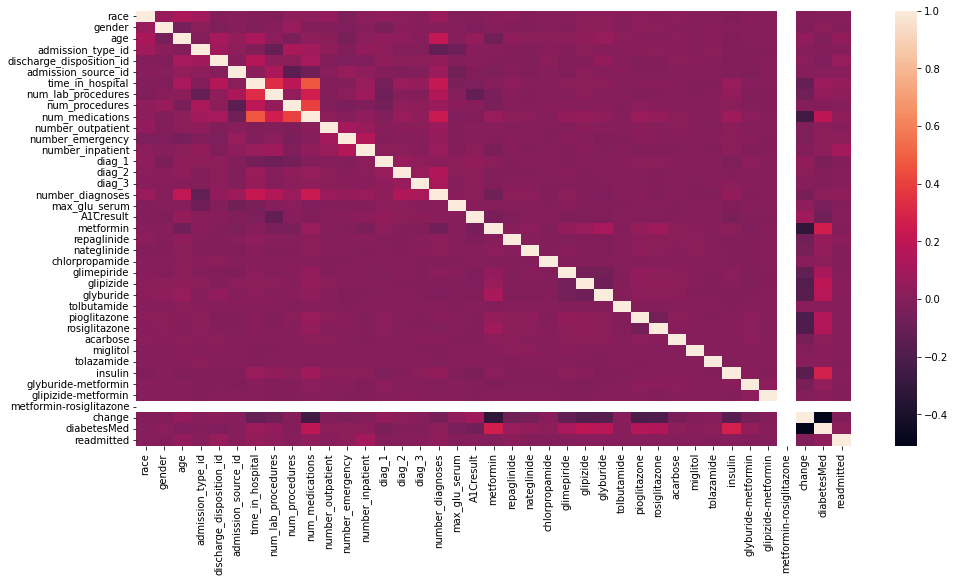

In [276]:
plt.figure(figsize=(16,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

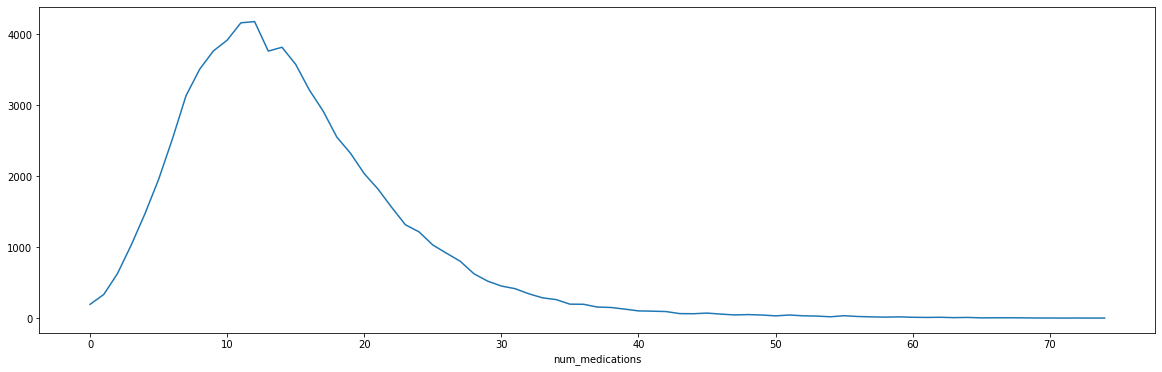

In [277]:
number_medication=pd.DataFrame(df["num_medications"]).groupby("num_medications")["num_medications"].count()
number_medication.plot(kind='line',figsize= (20,6))
plt.show()

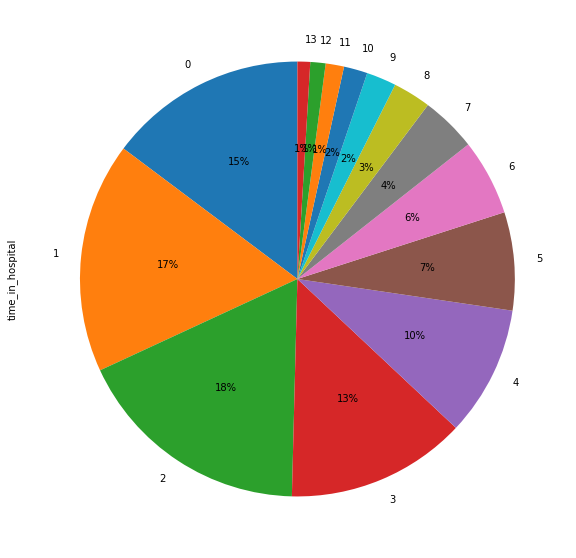

In [278]:
time_in_hospital=pd.DataFrame(df["time_in_hospital"]).groupby("time_in_hospital")["time_in_hospital"].count()
time_in_hospital.plot(kind='pie', subplots=True, shadow = False,autopct='%1.0f%%',startangle=90,figsize=(15,10))
plt.show()

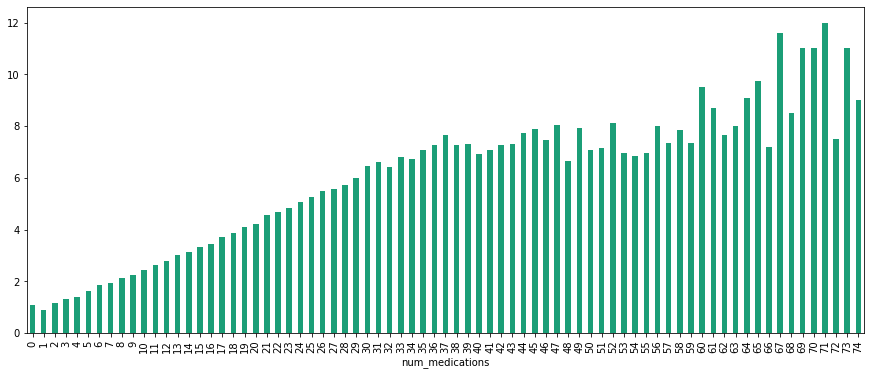

In [279]:
medication_vs_time=pd.DataFrame(df["num_medications"])
medication_vs_time.insert(1,"time_in_hospital",df["time_in_hospital"])
medication_vs_time=medication_vs_time.groupby("num_medications").mean()
medication_vs_time["time_in_hospital"].plot(kind='bar',cmap='Dark2',figsize= (15,6))
plt.show()

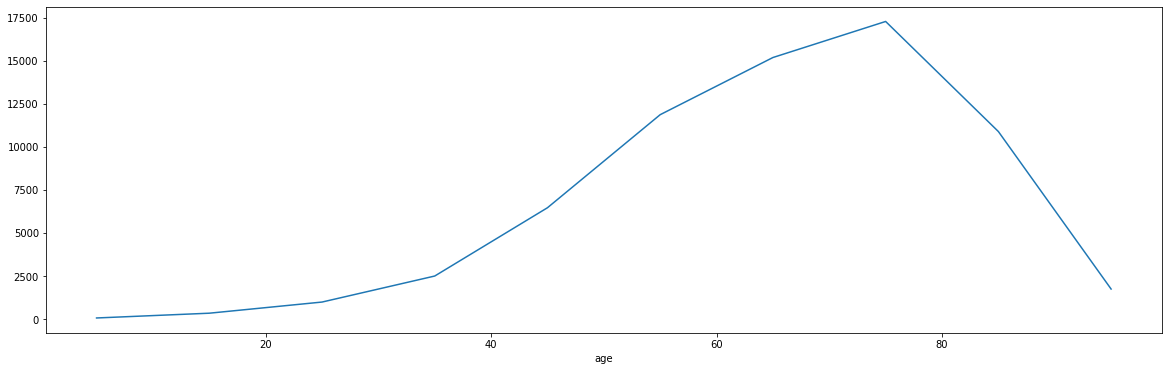

In [280]:
data.groupby("age")["age"].count().plot(kind='line',figsize= (20,6))
plt.show()

In [281]:
nb_medicament=df.groupby("num_medications")
print(nb_medicament.get_group(1).shape[0])

333


In [282]:
def res_metrics(X_act,y_act, y_pred, thresh=0.5):
    auc = roc_auc_score(y_act, y_pred)
    accuracy = accuracy_score(y_act, (y_pred > thresh))
    recall = recall_score(y_act, (y_pred > thresh))
    precision = precision_score(y_act, (y_pred > thresh))
    f1score = f1_score(y_act,(y_pred > thresh) )
    specificity = sum((y_pred < thresh) & (y_act == 0)) /sum(y_act ==0)
    r2score=r2_score(y_act, y_pred)
    ar2_score=1 - (1-r2_score(y_act, y_pred))*(len(y_act)-1)/(len(y_act)-X_act.shape[1]-1)
    mae=mean_absolute_error(y_act, y_pred)
    mse=sklearn.metrics.mean_squared_error(y_act, y_pred)
    rmse=np.sqrt(sklearn.metrics.mean_squared_error(y_act, y_pred))
    res=pd.DataFrame({
    'Metrics': ['AUC', 'Accuracy', 'Recall', 'Precision','F1 score','Specificity','R^2','Adjusted R^2','Mean Absolute Error','Mean Squared Error','Rooted Mean Square Error'],
    'Results': [round(auc,3),round(accuracy,3),round(recall,3),round(precision,3),round(f1score,3),round(specificity,3),round(r2score,3),round(ar2_score,3),round(mae,3),round(mse,3),round(rmse,3)]})
    res.set_index('Metrics',inplace=True)
    return res

def roc_auc(y_act, y_pred, plot=True, label = "curve"):
    prob = y_pred/y_pred.max() #normalize
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_act, prob, drop_intermediate=True)    
    auc = sklearn.metrics.auc(fpr, tpr)
    if plot:
        plt.scatter(x=fpr, y=tpr, color='navy')
        rcolor = tuple(np.random.rand(3,1)[:,0])
        plt.plot(fpr, tpr, c=rcolor, lw=2, label=label + ' (AUC = %0.3f)' % auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    return

In [283]:
X, y = data.loc[:,data.columns!='readmitted'],data['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45091, 38) (22209, 38) (45091,) (22209,)


In [284]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

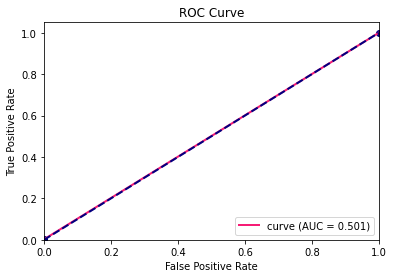

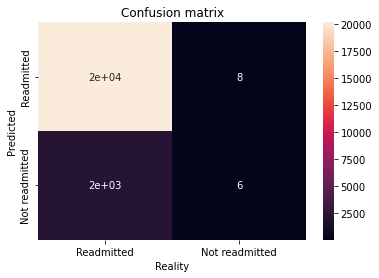

,Results
Metrics,
AUC,0.501
Accuracy,0.909
Recall,0.003
Precision,0.429
F1 score,0.006
Specificity,1.000
R^2,-0.101
Adjusted R^2,-0.103
Mean Absolute Error,0.091


In [285]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
res_metrics(X_test,y_test,y_pred)
roc_auc( y_test, y_pred)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, y_pred),annot=True,
            xticklabels=["Readmitted", "Not readmitted"], 
            yticklabels=["Readmitted", "Not readmitted"])
plt.ylabel("Predicted")
plt.xlabel("Reality")
plt.title("Confusion matrix")
plt.show()
res_metrics(X_test,y_test,y_pred)


In [242]:
data.readmitted.value_counts()

0    61210
1     6090
Name: readmitted, dtype: int64

In [243]:
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 41046, 1: 4045})
New dataset shape Counter({0: 41046, 1: 41046})


In [244]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.33)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [245]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('MLPC', MLPClassifier(solver='lbfgs', alpha=1e5,hidden_layer_sizes=(5, 5), random_state=1)))
results=[]
names=[]
for name, model in models:
    kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg="%s:%f" % (name,cv_results.mean())
    print(msg)

LR:0.581899
LDA:0.582189
NB:0.503773
KNN:0.799349
CART:0.894002
RFC:0.950001
XGB:0.950037
ADA:0.883766
MLPC:0.501955


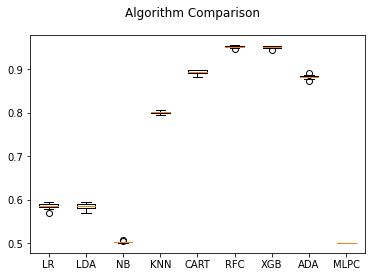

In [198]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [199]:
C_params = [10**x for x in np.arange(-2.5,2.5,0.1)]
param_grid = {
        'penalty':['l1'], #lasso only
        'C':C_params
}


clf = GridSearchCV(LogisticRegression(C=1, penalty='l1', solver='liblinear'), param_grid, cv=5, scoring='roc_auc', verbose=3, n_jobs=10)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, penalty='l1',
                                          solver='liblinear'),
             n_jobs=10,
             param_grid={'C': [0.0031622776601683794, 0.003981071705534973,
                               0.005011872336272725, 0.006309573444801936,
                               0.00794328234724282, 0.01000000000000001,
                               0.012589254117941687, 0.01584893192461116,
                               0.01995262314968883, 0.025118864315095846,
                               0.03162277660168386, 0.0398107170...
                               0.07943282347242837, 0.10000000000000031,
                               0.12589254117941714, 0.1584893192461119,
                               0.1995262314968887, 0.251188643150959,
                               0.3162277660168392, 0.398107170553499,
                               0.5011872336272746, 0.6309573444801962,
                               0.7943282347242854, 1.000000000000005,
                               1.258925411794174, 1.5848931924611223,
                               1.995262314968891, 2.5118864315095952, ...],
                         'penalty': ['l1']},
             scoring='roc_auc', verbose=3)

In [200]:
lr = clf.best_estimator_
lr.fit(X_train,y_train)
feat_imp = pd.Series(index=X.columns, data=lr.coef_[0])
feat_imp.sort_values(ascending=False)

number_inpatient            0.225913
discharge_disposition_id    0.150219
age                         0.146199
number_diagnoses            0.114306
diabetesMed                 0.108368
num_lab_procedures          0.056592
time_in_hospital            0.051894
max_glu_serum               0.046412
num_medications             0.046090
number_emergency            0.034129
repaglinide                 0.023640
change                      0.019981
acarbose                    0.011648
metformin-rosiglitazone     0.000000
gender                      0.000000
race                        0.000000
insulin                    -0.000267
tolbutamide                -0.007294
miglitol                   -0.009450
diag_3                     -0.013331
glyburide-metformin        -0.014751
rosiglitazone              -0.015073
number_outpatient          -0.018268
glipizide-metformin        -0.019029
tolazamide                 -0.019099
glipizide                  -0.019989
nateglinide                -0.025865
d

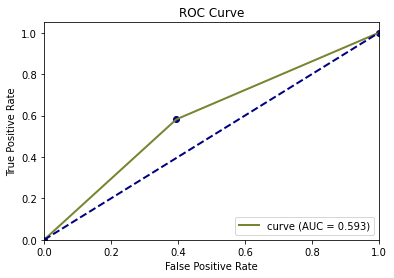

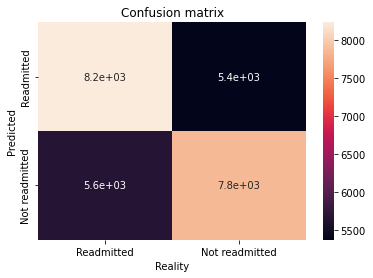

,Results
Metrics,
AUC,0.593
Accuracy,0.593
Recall,0.581
Precision,0.594
F1 score,0.588
Specificity,0.605
R^2,-0.626
Adjusted R^2,-0.629
Mean Absolute Error,0.407


In [201]:
y_pred = lr.predict(X_test)
roc_auc(y_test,y_pred)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, y_pred),annot=True,
            xticklabels=["Readmitted", "Not readmitted"], 
            yticklabels=["Readmitted", "Not readmitted"])
plt.ylabel("Predicted")
plt.xlabel("Reality")
plt.title("Confusion matrix")
plt.show()
lr_res=res_metrics(X_test,y_test,y_pred)
lr_res

In [202]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=True, n_jobs=10)
rf.fit(X_train, y_train)
#65min

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='roc_auc', verbose=True)

In [203]:
#rf=RandomForestClassifier()
#rf.fit(X_train, y_train)

In [204]:
rf = rf.best_estimator_

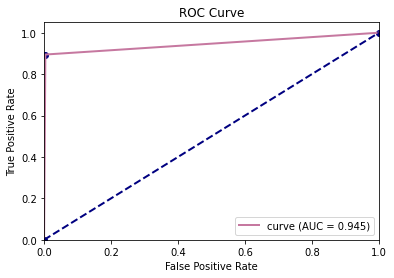

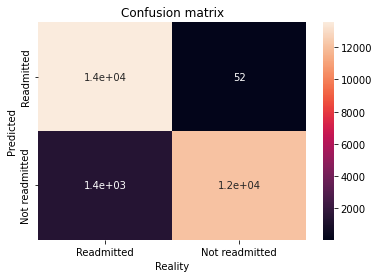

,Results
Metrics,
AUC,0.945
Accuracy,0.946
Recall,0.895
Precision,0.996
F1 score,0.942
Specificity,0.996
R^2,0.782
Adjusted R^2,0.782
Mean Absolute Error,0.054


In [205]:
y_pred = rf.predict(X_test)
roc_auc(y_test,y_pred)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, y_pred),annot=True,
            xticklabels=["Readmitted", "Not readmitted"], 
            yticklabels=["Readmitted", "Not readmitted"])
plt.ylabel("Predicted")
plt.xlabel("Reality")
plt.title("Confusion matrix")
plt.show()
rf_res=res_metrics(X_test,y_test,y_pred)
rf_res

In [206]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)
grid_search.fit(X_train, y_train)
#execution time: 14min

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [207]:
xgb=grid_search.best_estimator_

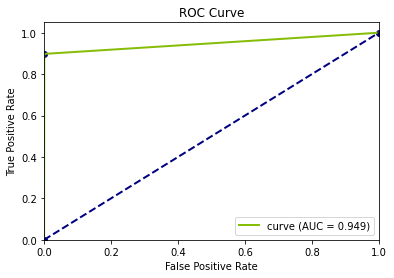

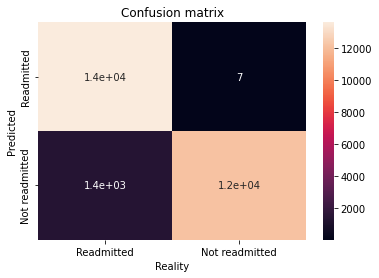

,Results
Metrics,
AUC,0.949
Accuracy,0.949
Recall,0.898
Precision,0.999
F1 score,0.946
Specificity,0.999
R^2,0.795
Adjusted R^2,0.795
Mean Absolute Error,0.051


In [208]:
y_pred = xgb.predict(X_test)
roc_auc(y_test,y_pred)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, y_pred),annot=True,
            xticklabels=["Readmitted", "Not readmitted"], 
            yticklabels=["Readmitted", "Not readmitted"])
plt.ylabel("Predicted")
plt.xlabel("Reality")
plt.title("Confusion matrix")
plt.show()
xgb_res=res_metrics(X_test,y_test,y_pred)
xgb_res

In [209]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [210]:
dt=grid_search.best_estimator_

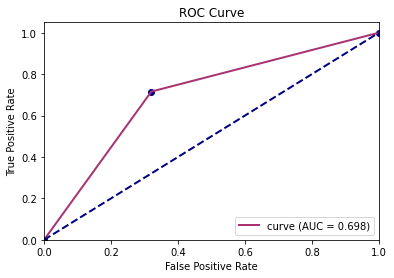

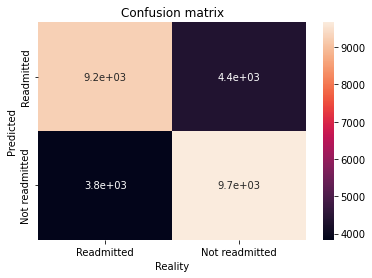

,Results
Metrics,
AUC,0.698
Accuracy,0.698
Recall,0.716
Precision,0.689
F1 score,0.702
Specificity,0.680
R^2,-0.209
Adjusted R^2,-0.211
Mean Absolute Error,0.302


In [211]:
y_pred = dt.predict(X_test)
roc_auc(y_test,y_pred)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, y_pred),annot=True,
            xticklabels=["Readmitted", "Not readmitted"], 
            yticklabels=["Readmitted", "Not readmitted"])
plt.ylabel("Predicted")
plt.xlabel("Reality")
plt.title("Confusion matrix")
plt.show()
dt_res=res_metrics(X_test,y_test,y_pred)
dt_res

In [212]:
comparison=pd.concat([lr_res,rf_res,xgb_res,dt_res],axis=1).T
comparison.reset_index(drop=True,inplace=True)
comparison.columns.name='Models'
comparison.rename(index={0: 'Logistic Regression',1: 'Random Forest', 2:'XGBoost', 3:'Decision Tree'}, inplace=True)
comparison.sort_values(by='R^2', ascending=False)

Models,AUC,Accuracy,Recall,Precision,F1 score,Specificity,R^2,Adjusted R^2,Mean Absolute Error,Mean Squared Error,Rooted Mean Square Error
XGBoost,0.949,0.949,0.898,0.999,0.946,0.999,0.795,0.795,0.051,0.051,0.226
Random Forest,0.945,0.946,0.895,0.996,0.942,0.996,0.782,0.782,0.054,0.054,0.233
Decision Tree,0.698,0.698,0.716,0.689,0.702,0.680,-0.209,-0.211,0.302,0.302,0.550
Logistic Regression,0.593,0.593,0.581,0.594,0.588,0.605,-0.626,-0.629,0.407,0.407,0.638
